<center> 
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Logo_Mondragon_Unibertsitatea.png" width="150" height="100" float ="left">


---
<h3>Jon Amelibia, Iker Cumplido, Aitor Hernandez, Daniel Puente and Iñigo Ugarte

## Index
---

- <a href='#1'><ins>1. Loading of Libraries and Data<ins></a>
- <a href='#2'><ins>2. Creating x and y<ins></a>
- <a href='#3'><ins>3. Plotting results<ins> </a>
- <a href='#4'><ins>4. Performance of the model for different time steps<ins> </a>
- <a href='#5'><ins>5. Hyperas vs First LSTM bidirectional<ins> </a>

### <a id='1'>1. Loading of Libraries and Data</a>
---

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

import warnings
warnings.filterwarnings('ignore')

Necessary functions to evaluate, load and plot modelo performaced

In [2]:
from functions import ResultsFunctions as rf

Main variables

In [3]:
path_origin, path_processed = "../02_data/original_data/", "../02_data/processed_data/"
models_path = "../03_models/models/"
palette = ['#264653','#2A9D8F','#85CAC2','#DFF6F4' ,'#E9C46A','#F4A261','#E76F51','#C53D1B', '#7E2711']
cells = [f'\Cell{x}\*' for x in range(1, 9)]
font = {'size': 16, 'color': 'black', 'weight': 'bold'}

Processed dataset      
We process the data, changing the type to float and removing the negatives

In [4]:
df_desc_final_pickle_load = pd.read_pickle(path_processed + 'df_desc_final.pkl')
df_desc_final_pickle = df_desc_final_pickle_load[df_desc_final_pickle_load.RUL >= 0 ]
df_desc_final_pickle["RUL"] = df_desc_final_pickle["RUL"].astype(float)
df_desc_final_pickle_not_index = df_desc_final_pickle.reset_index(col_level=0)
print(df_desc_final_pickle.shape)

(390, 41)


### <a id='2'>2. Creating x and y  </a>
---

With this fucntion we divide the data into train and test, we normalize the data and we create the X and Y variables.   
In addition, we do it stratificating by battery and quartiles

In [5]:
x, y = rf.x_and_y(df_desc_final_pickle, num_steps = 10, index = False)
X_train, X_test, y_train, y_test, y_train_mod, y_test_mod = rf.stratified_split(x, y, stratify_2 = True)
X_train_false, X_test_false, y_train_false, y_test_false, y_train_mod_false, y_test_mod_false = rf.stratified_split(x, y, stratify_2 = False)

(302, 11, 40) (302, 3)


### Results
---

With this function every trained model is loaded, and printing the results for both train and test data

In [6]:
ypred_train_lstm_good_adapted, ypred_lstm_good_adapted = rf.return_metric('first_model_LSTM', X_train, X_test, y_train, y_test, y_train_mod, y_test_mod)
ypred_train_gru_good_adapted, ypred_gru_good_adapted = rf.return_metric('first_model_GRU', X_train, X_test, y_train, y_test, y_train_mod, y_test_mod)
ypred_train_bi_lstm_good_adapted_11, ypred_bi_lstm_good_adapted_11 = rf.return_metric('Bidirectional_LSTM_adapted', X_train, X_test, y_train, y_test, y_train_mod, y_test_mod)
ypred_train_bi_gru_good_adapted, ypred_bi_lstm_gru_adapted = rf.return_metric('Bidirectional_GRU', X_train, X_test, y_train, y_test, y_train_mod, y_test_mod)
ypred_train_bi_hyperas_lstm25, ypred_bi_hyperas_lstm25 = rf.return_metric('tryals_bidirectional_lstm_25', X_train_false, X_test_false, y_train_false, y_test_false, y_train_mod_false, y_test_mod_false)
ypred_train_bi_hyperas_lstm24, ypred_bi_hyperas_lstm24 = rf.return_metric('tryals_bidirectional_lstm_24', X_train_false, X_test_false, y_train_false, y_test_false, y_train_mod_false, y_test_mod_false)

8/8 [==============================] - 1s 7ms/step
Train --> -0.15824186623086978 979.6215968468377 1436.681860394769 9103551852.09952
2/2 [==============================] - 0s 5ms/step
Test --> -0.31622676752748324 1111.9893808833888 1571.735836849322 11142575482.580719

8/8 [==============================] - 1s 56ms/step
Train --> 0.9966980610878523 41.99316976080297 76.70885424603892 3138806.8838582076
2/2 [==============================] - 0s 63ms/step
Test --> 0.9855367419474046 115.00336468806032 164.75828539841666 15012738.538334267

8/8 [==============================] - 1s 70ms/step
Train --> 0.9986223938717107 36.26409035203862 49.547701427739874 400800.9943118187
2/2 [==============================] - 0s 66ms/step
Test --> 0.9937188394985599 76.92724434274142 108.57607594566089 4745582.0221905885

8/8 [==============================] - 1s 8ms/step
Train --> 0.9988491492088808 21.939030026004524 45.286680599566665 748463.3020360948
2/2 [==============================] - 0s 8m

### <a id='3'>3. Plotting results
---

#### **Final LSTM**

* Train

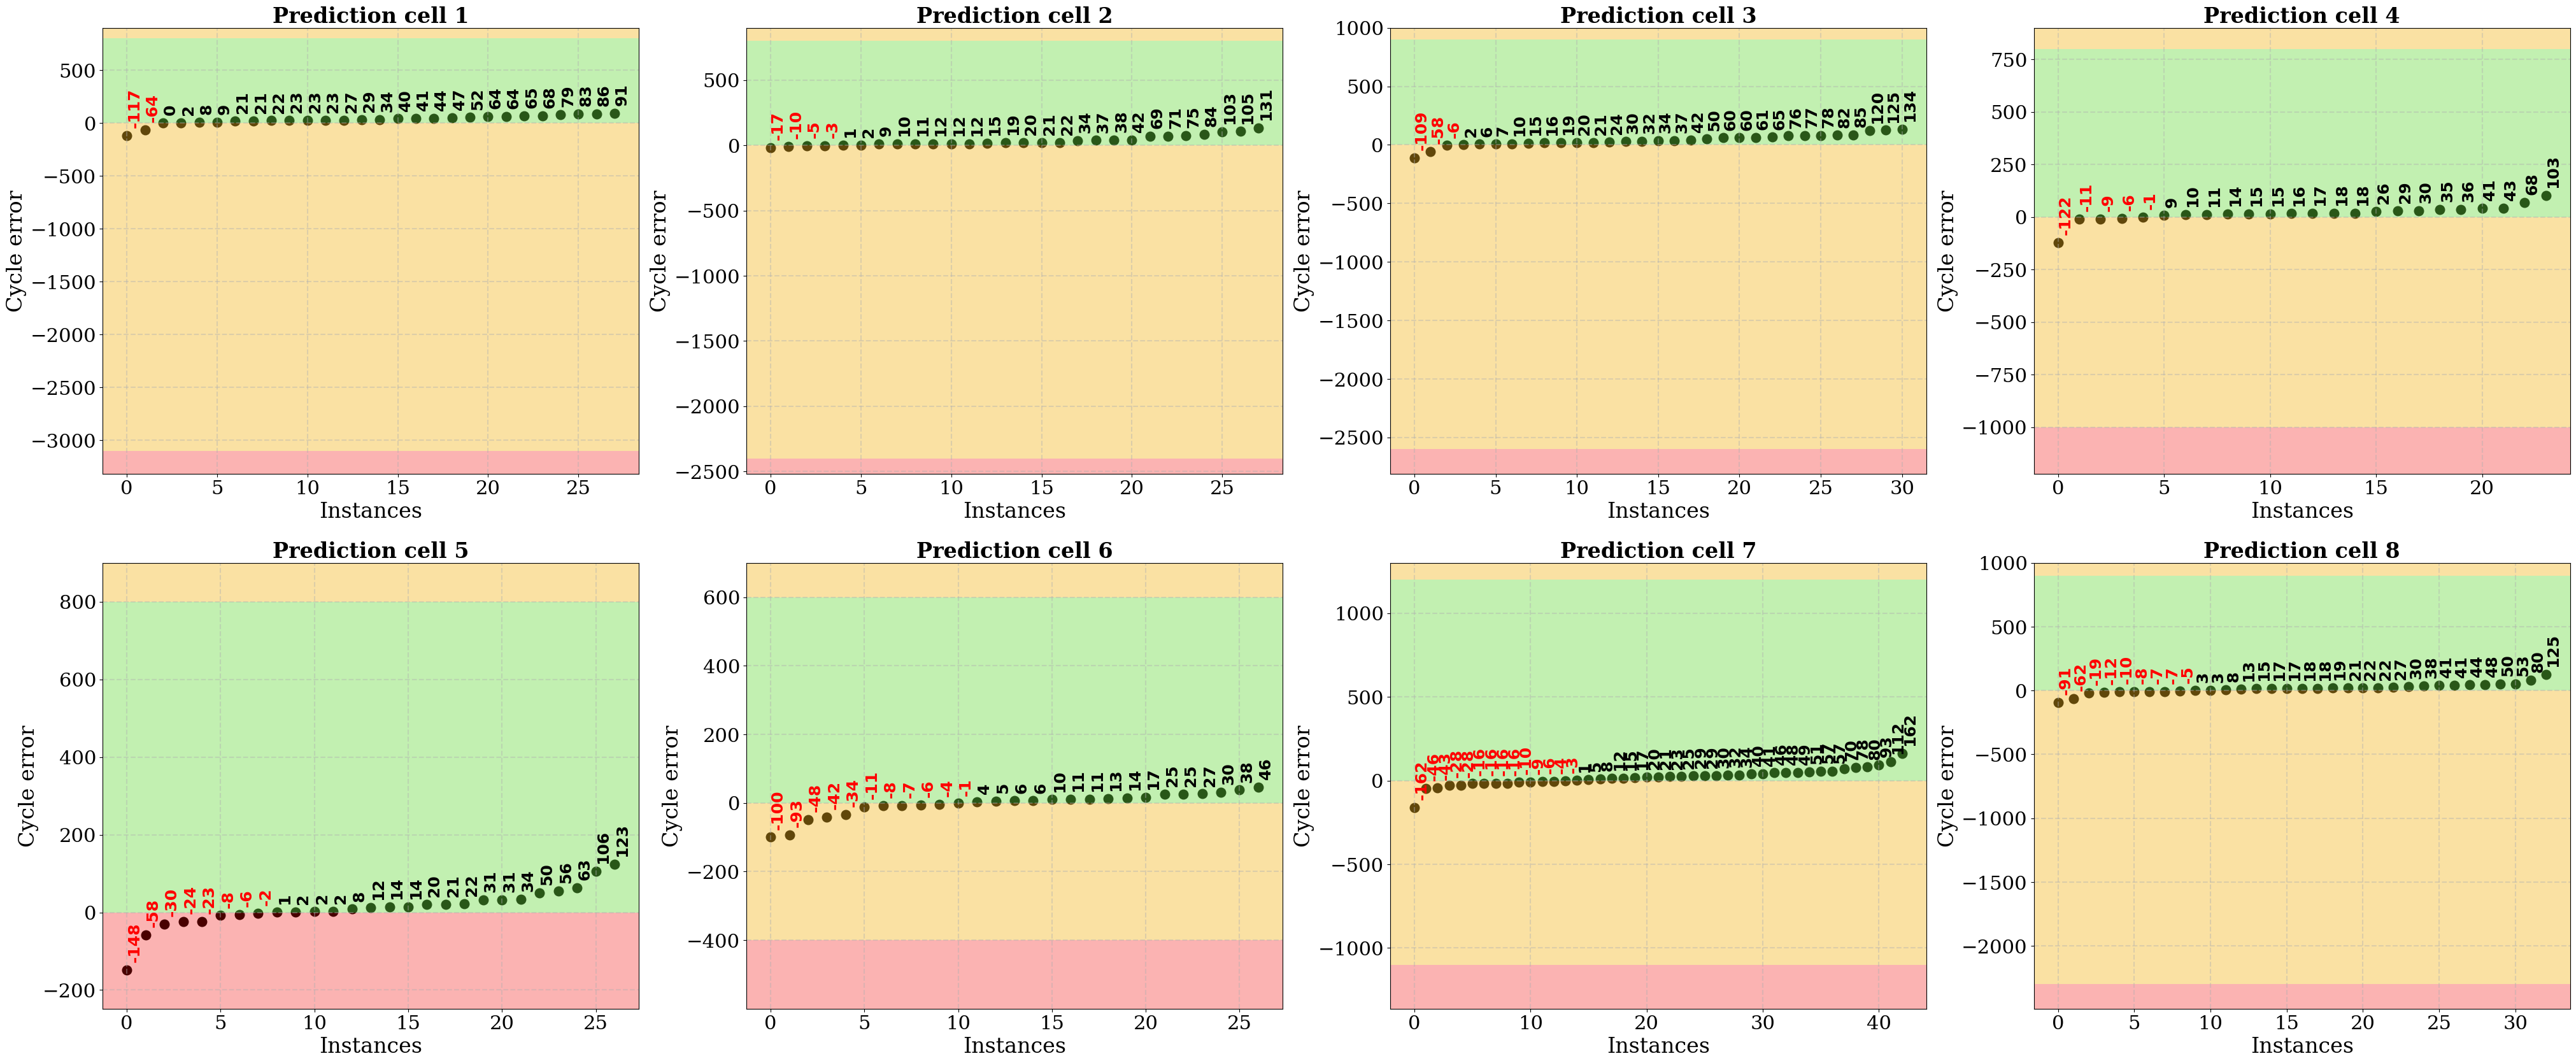

In [7]:
rf.scatter_plot_prediction(ypred_train_bi_lstm_good_adapted_11, y_train, y_train_mod)

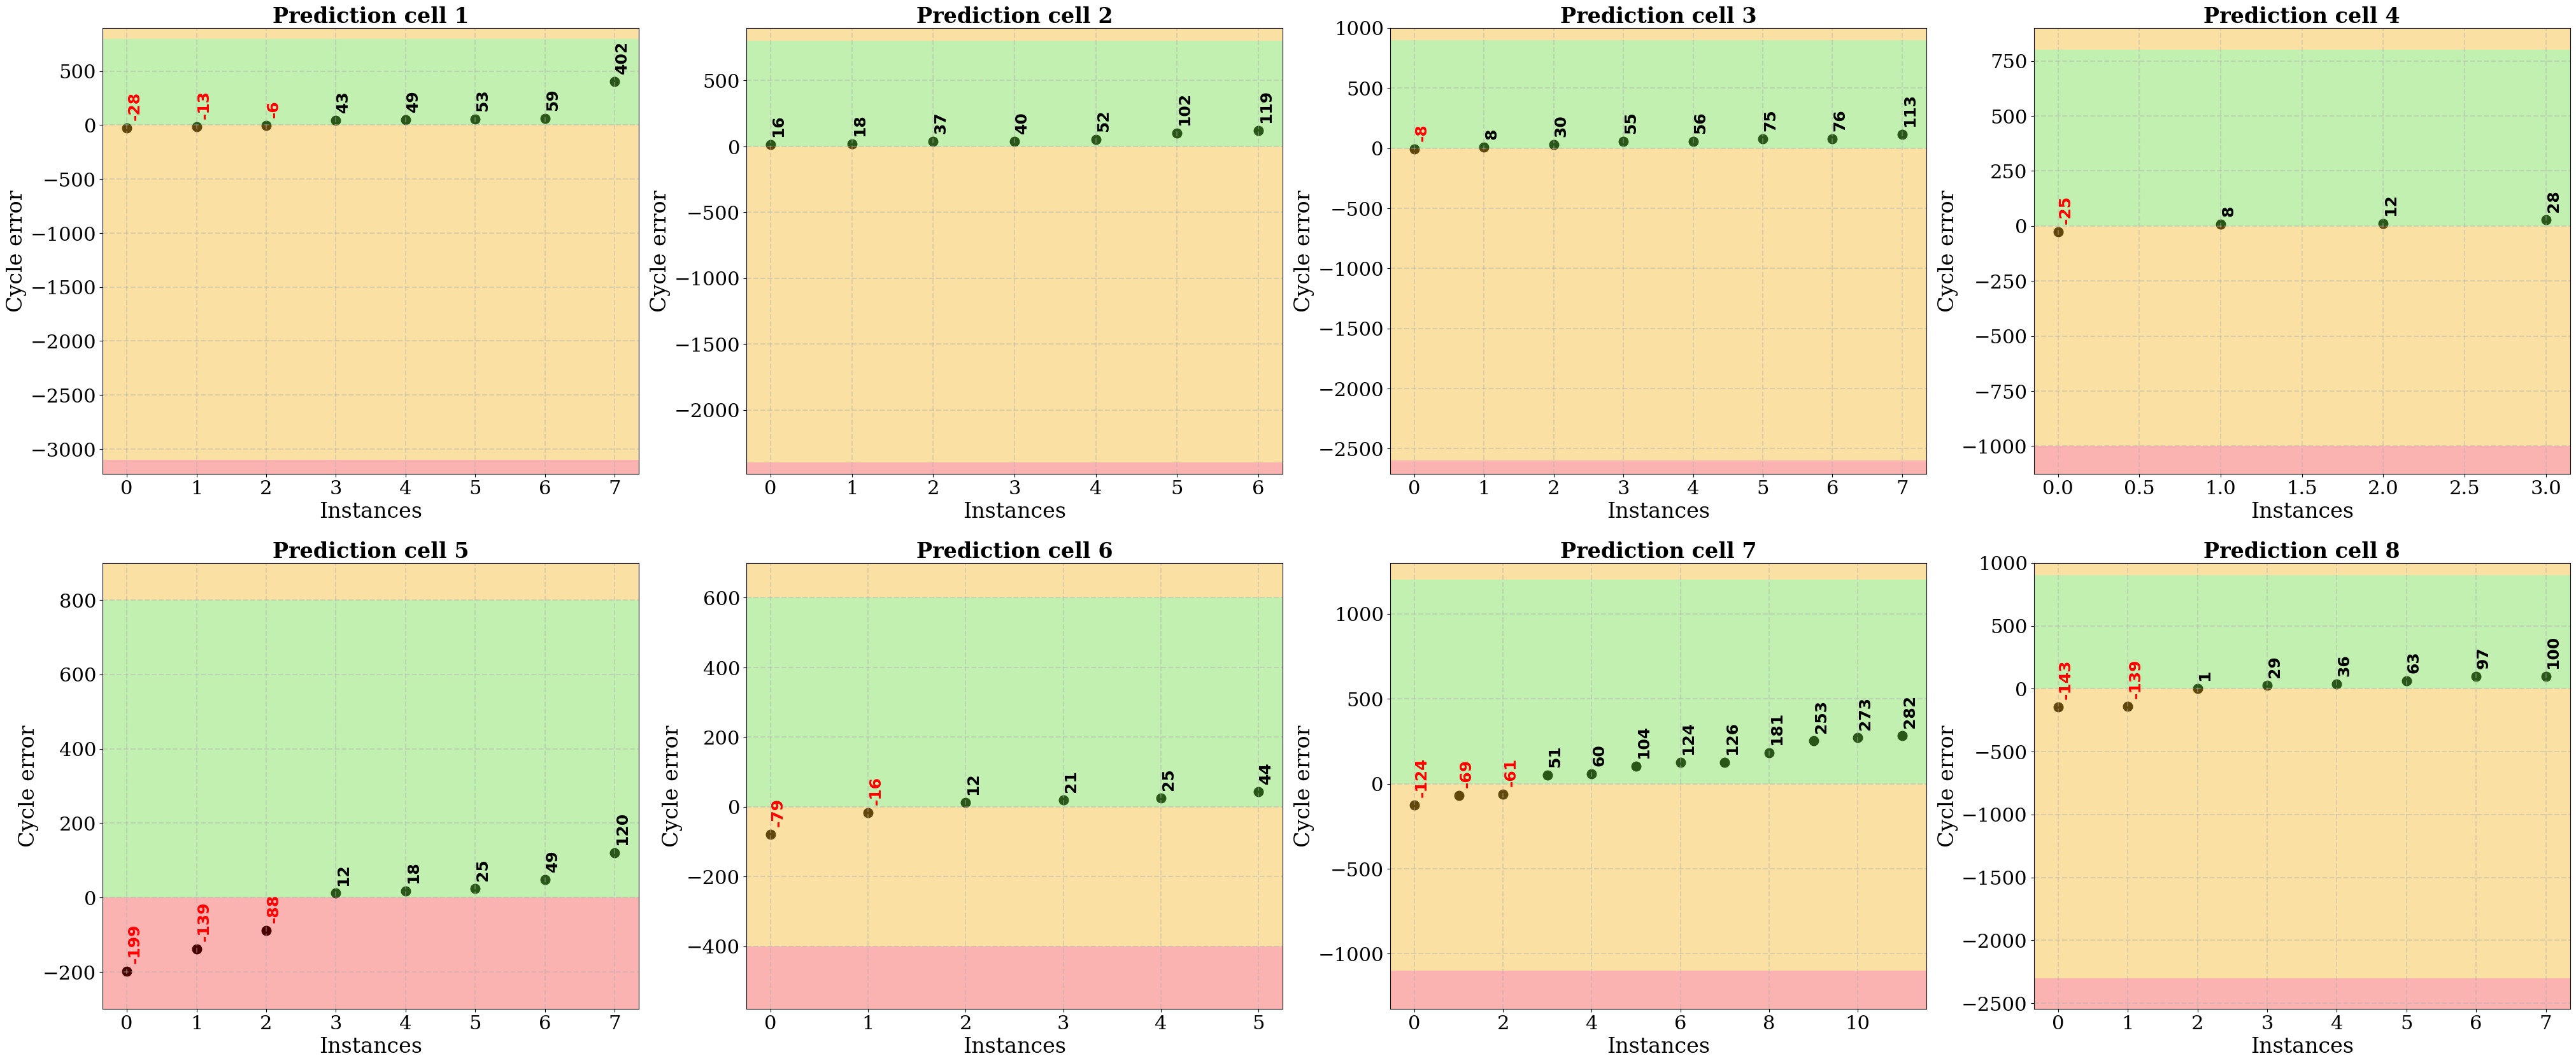

In [8]:
rf.scatter_plot_prediction(ypred_bi_lstm_good_adapted_11, y_test, y_test_mod)

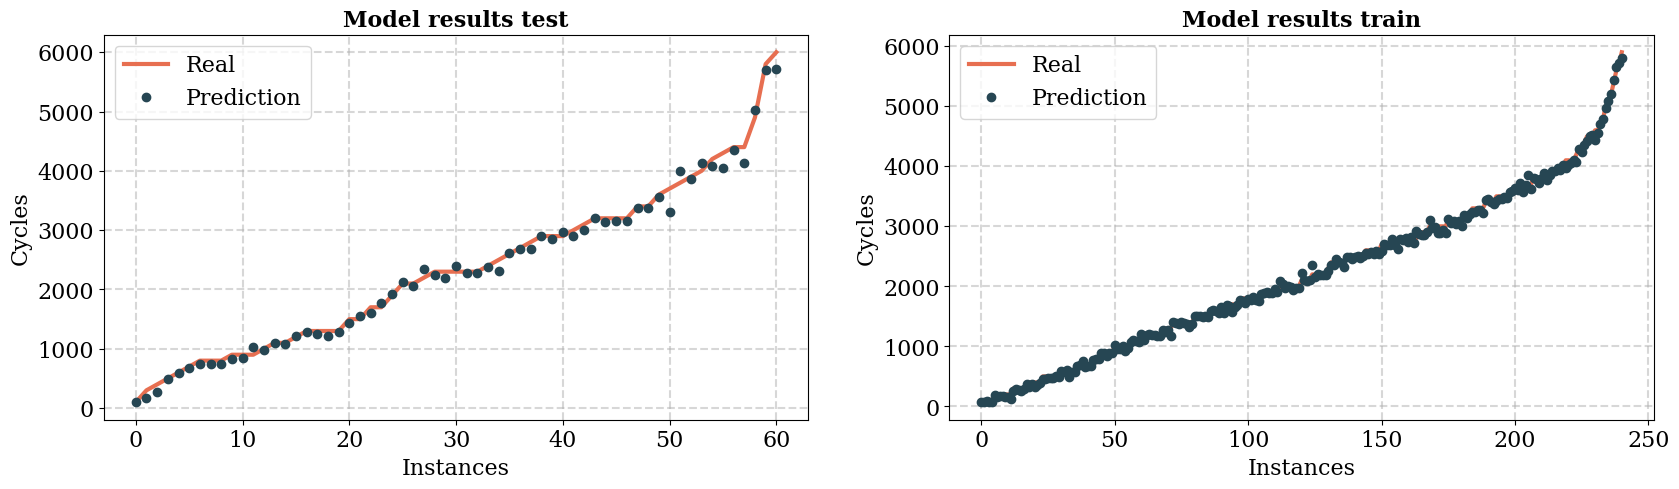

In [8]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
rf.line_plot_result(ypred_bi_lstm_good_adapted_11, y_test, ' test')
plt.subplot(1, 2, 2)
rf.line_plot_result(ypred_train_bi_lstm_good_adapted_11, y_train, ' train')

### <a id='4'>4. Performance of the model for different time steps </a>

---

First, we transform the data to predicti with different time steps

In [9]:
x_3, y_3 = rf.x_and_y(df_desc_final_pickle, num_steps = 2, index = False)
X_train_3, X_test_3, y_train_3, y_test_3, y_train_mod_3, y_test_mod_3 = rf.stratified_split(x_3, y_3, stratify_2 = True)

x_5, y_5 = rf.x_and_y(df_desc_final_pickle, num_steps = 4, index = False)
X_train_5, X_test_5, y_train_5, y_test_5, y_train_mod_5, y_test_mod_5 = rf.stratified_split(x_5, y_5, stratify_2 = True)

x_7, y_7 = rf.x_and_y(df_desc_final_pickle, num_steps = 6, index = False)
X_train_7, X_test_7, y_train_7, y_test_7, y_train_mod_7, y_test_mod_7 = rf.stratified_split(x_7, y_7, stratify_2 = True)

x_9, y_9 = rf.x_and_y(df_desc_final_pickle, num_steps = 8, index = False)
X_train_9, X_test_9, y_train_9, y_test_9, y_train_mod_9, y_test_mod_9 = rf.stratified_split(x_9, y_9, stratify_2 = True)

(366, 3, 40) (366, 3)
(350, 5, 40) (350, 3)
(334, 7, 40) (334, 3)
(318, 9, 40) (318, 3)


We load the models and predict with the previus sets

In [10]:
ypred_train_bi_lstm_good_adapted_3, ypred_bi_lstm_good_adapted_3 = rf.return_metric('Bidirectional_LSTM_adapted_3', X_train_3, X_test_3, y_train_3, y_test_3, y_train_mod_3, y_test_mod_3)
ypred_train_bi_lstm_good_adapted_5, ypred_bi_lstm_good_adapted_5 = rf.return_metric('Bidirectional_LSTM_adapted_5', X_train_5, X_test_5, y_train_5, y_test_5, y_train_mod_5, y_test_mod_5)
ypred_train_bi_lstm_good_adapted_7, ypred_bi_lstm_good_adapted_7 = rf.return_metric('Bidirectional_LSTM_adapted_7', X_train_7, X_test_7, y_train_7, y_test_7, y_train_mod_7, y_test_mod_7)
ypred_train_bi_lstm_good_adapted_9, ypred_bi_lstm_good_adapted_9 = rf.return_metric('Bidirectional_LSTM_adapted_9', X_train_9, X_test_9, y_train_9, y_test_9, y_train_mod_9, y_test_mod_9)

10/10 [==============================] - 1s 19ms/step
Train --> 0.9878956520342229 126.73712335873957 171.80318837813553 19011489.01404072
3/3 [==============================] - 0s 17ms/step
Test --> -2.864031239552643 547.5356076214764 3180.3895929275936 12482129823.991995

9/9 [==============================] - 1s 30ms/step
Train --> 0.3293934983755544 1018.7868346078055 1244.9463003995613 4739300896.1474285
3/3 [==============================] - 0s 27ms/step
Test --> 0.36254493502557983 959.5962476457868 1200.0837168164576 4089203877.7559414

9/9 [==============================] - 1s 55ms/step
Train --> 0.996957952677239 61.070232919985884 80.5031271510753 1881184.261688805
3/3 [==============================] - 0s 45ms/step
Test --> 0.9849771455207651 99.04745119009445 179.26831448802426 16154603.291642064

8/8 [==============================] - 1s 70ms/step
Train --> 0.9988640666553203 35.00494736198365 47.79557469499811 306788.9435441264
2/2 [==============================] - 0s 

We calculate the rmse for each model and plot the results.

In [11]:
def rmse(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
list_rmse_test = [rmse(y_test_3, ypred_bi_lstm_good_adapted_3), rmse(y_test_5, ypred_bi_lstm_good_adapted_5), rmse(y_test_7, ypred_bi_lstm_good_adapted_7), \
                                                           rmse(y_test_9, ypred_bi_lstm_good_adapted_9), rmse(y_test, ypred_bi_lstm_good_adapted_11)]

As expected, as the number of steps increases then the results get better

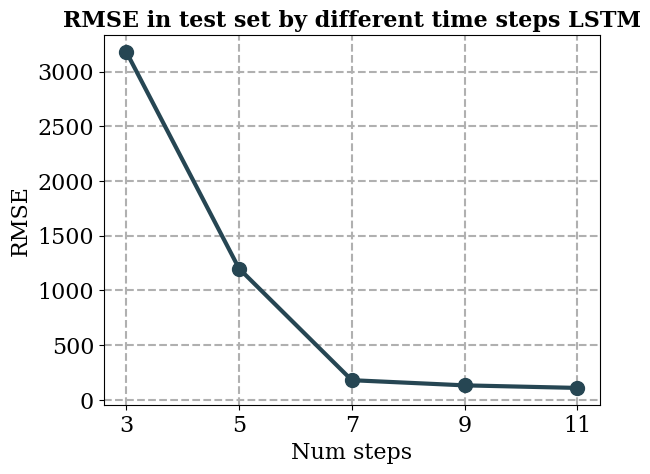

In [12]:
eje_x = ['3', '5', '7', '9', '11']
plt.plot(eje_x, list_rmse_test, color=palette[0], linewidth=3.0)
plt.plot(eje_x, list_rmse_test, 'bo', color=palette[0], markersize=10, label='RMSE Train')
plt.xticks(fontsize=16, family='serif'), plt.yticks(fontsize=16, family='serif'), plt.grid(linestyle='--',linewidth=1.5);
plt.xlabel('Num steps', fontsize = 16, family='serif'), plt.ylabel('RMSE', fontsize = 16, family='serif'),  plt.title(f'RMSE in test set by different time steps LSTM', fontdict=font, family='serif');

### <a id='5'>5. Hyperas vs First LSTM bidirectional </a>

---

We compare the RMSE and range values of the different models.    
This procedure is carried out for both train and test data

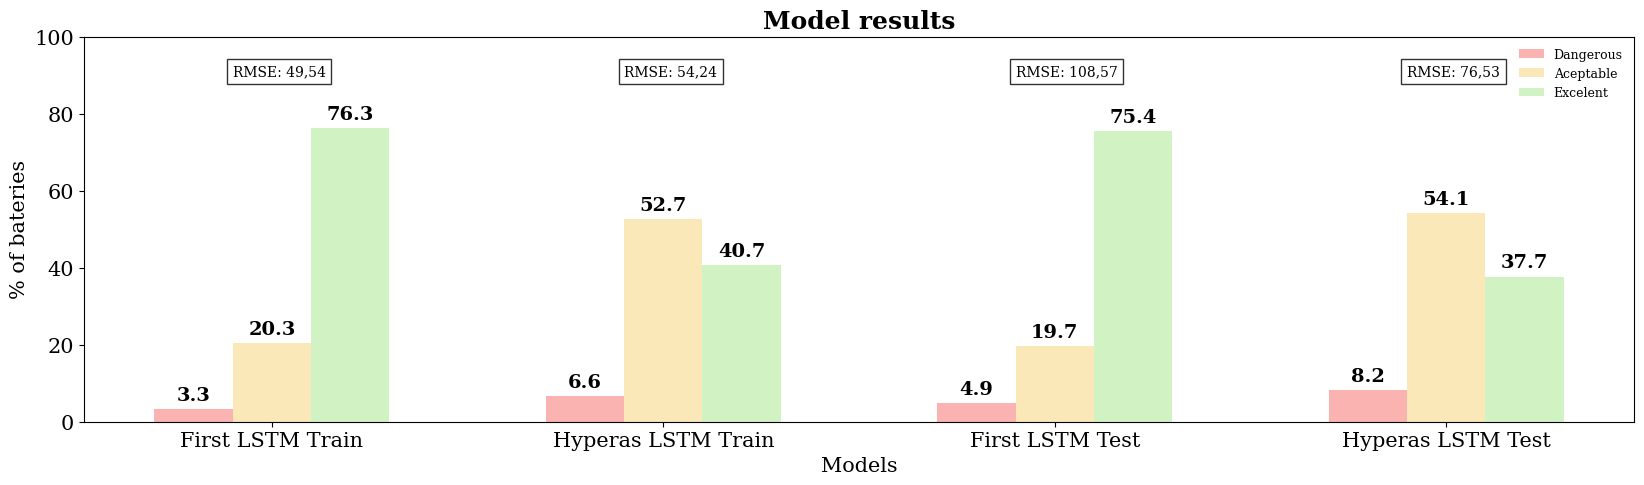

In [13]:
green_list_1, yellow_list_1, red_list_1 = rf.green_yellow_red(ypred_bi_lstm_good_adapted_11, y_test, y_test_mod)
green_list_1_train, yellow_list_1_train, red_list_1_train = rf.green_yellow_red(ypred_train_bi_lstm_good_adapted_11, y_train, y_train_mod)
green_list_24, yellow_list_24, red_list_24 = rf.green_yellow_red(ypred_bi_hyperas_lstm24, y_test_false, y_test_mod_false)
green_list_24_train, yellow_list_24_train, red_list_24_train = rf.green_yellow_red(ypred_train_bi_hyperas_lstm24, y_train_false, y_train_mod_false)

rf.bar_plot_comparison(['First LSTM Train', 'Hyperas LSTM Train', 'First LSTM Test', 'Hyperas LSTM Test'], \
                    [red_list_1_train, red_list_24_train, red_list_1, red_list_24], \
                    [yellow_list_1_train, yellow_list_24_train, yellow_list_1, yellow_list_24], \
                    [green_list_1_train, green_list_24_train, green_list_1, green_list_24])

plt.legend(loc='upper right', fontsize=9, frameon=False);
for text in plt.gca().get_legend().get_texts(): plt.setp(text, family='serif')

plt.text(-0.1, 90, 'RMSE: 49,54', fontsize=10,bbox=dict(edgecolor='black', alpha=0.8, linewidth=1, facecolor='white'), family='serif');
plt.text(0.9, 90, 'RMSE: 54,24', fontsize=10,bbox=dict(edgecolor='black', alpha=0.8, linewidth=1, facecolor='white'), family='serif');
plt.text(1.9, 90, 'RMSE: 108,57', fontsize=10,bbox=dict(edgecolor='black', alpha=0.8, linewidth=1, facecolor='white'), family='serif');
plt.text(2.9, 90, 'RMSE: 76,53', fontsize=10,bbox=dict(edgecolor='black', alpha=0.8, linewidth=1, facecolor='white'), family='serif');

---